## 错误可视化

对于任何科学的度量，准确地计算错误几乎和准确报告数字本身一样重要，甚至更为重要。例如，假设我正在使用一些天体观测来估计哈勃常数，这是对宇宙膨胀率的局部测量。我知道，目前的文献表明该值约为71（km / s）/ Mpc，我用我的方法测得的值为74（km / s）/ Mpc。值是否一致？给定此信息，唯一正确的答案是：没有办法知道。

假设我用报告的不确定性来补充此信息：当前文献表明该值约为71±
2.5（km / s）/ Mpc，我的方法测得的值为74±

5（km / s）/ Mpc。现在值是一致的吗？这是一个可以定量回答的问题。

在数据和结果的可视化中，有效显示这些错误可以使绘图传达更完整的信息。

### 基本错误栏表示
 
可以通过单个Matplotlib函数调用来创建基本的错误栏：

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

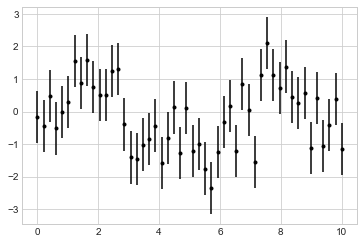

In [2]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
# yerr表示y的误差
plt.errorbar(x, y, yerr=dy, fmt='.k');


这里的fmt是控制线和点外观的格式代码，并且具有与plt.plot中使用的简写相同的语法，在Simple Line Plots和Simple Scatter Plots中进行了概述。
除了这些基本选项之外，错误栏功能还有许多选项可以微调输出。使用这些附加选项，可以轻松自定义误差线图的美感。

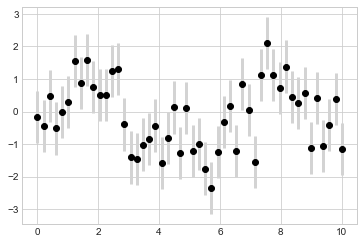

In [3]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);


除了这些选项之外，还可以指定水平误差线（xerr），单面误差线和许多其他变体。有关可用选项的更多信息，请参考plt.errorbar的文档字符串。
### 连续误差图
 
在某些情况下，希望显示连续数量的误差条。尽管Matplotlib没有针对此类应用程序的内置便利例程，但是将诸如plt.plot和plt.fill_between之类的原语组合起来相对容易，以获得有用的结果。

在这里，我们将使用Scikit-Learn API执行简单的高斯过程回归[scikit doc](https://scikit-learn.org/)。这是一种通过连续测量不确定性将非常灵活的非参数函数拟合到数据的方法。在这一点上，我们将不深入研究高斯过程回归的细节，而是将重点放在如何可视化这种连续误差测量上：

In [49]:
# GaussianProcessRegressor实现高斯回归
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)
# 
kernel = 1.0 * RBF(length_scale=10.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0)
# # Compute the Gaussian process fit
# gp = GaussianProcessRegressor(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1,
#                      random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
# MSE,yfit = gp.predict(xfit[:, np.newaxis], return_cov=True)
y_mean, y_cov= gp.predict(xfit[:, np.newaxis], return_cov=True)
dyfit = 2 * np.sqrt(np.diag(y_cov))  # 2*sigma ~ 95% confidence region


现在，我们有了xfit，yfit和dyfit，它们可以对我们的数据进行连续拟合。我们可以像上面那样将它们传递给plt.errorbar函数，但是我们真的不想绘制带有1,000个误差线的1,000点。相反，我们可以将plt.fill_between函数与浅色配合使用以可视化此连续错误：

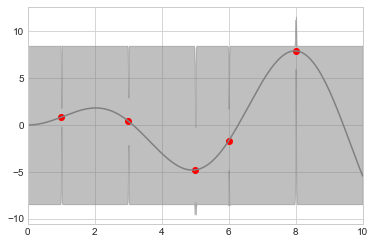

In [51]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, model(xfit), '-',  color='gray')
plt.fill_between(xfit, y_mean - dyfit,
                 y_mean + dyfit,
                 alpha=0.5, color='gray')
plt.xlim(0, 10);



注意我们在这里使用fill_between函数完成的操作：我们传递一个x值，然后传递较低的y边界，然后传递较高的y边界，结果是填充了这些区域之间的区域。

结果图非常直观地说明了高斯过程回归算法的作用：在测量数据点附近的区域中，模型受到严格约束，这反映在较小的模型误差中。在远离测量数据点的区域中，模型不受严格约束，并且模型误差增加。

有关plt.fill_between（）（以及密切相关的plt.fill（）函数）中可用选项的更多信息，请参见函数docstring或Matplotlib文档。

最后，如果您觉得这水平太低，请参阅“可视化与Seaborn”，我们将在此讨论Seaborn软件包，该软件包具有更简化的API，可以可视化这种类型的连续错误栏。